# Poster figures

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
# Importations
import seaborn as sns
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, BatchSampler, random_split
from itertools import chain

from src.covid_cytof_dataset import CovidCytofDataset
from src.models.configurable_nn import ConfigurableNeuralNetwork
from src.models.simple_nn import SimpleNeuralNetwork
from src.trainer import Trainer

sns.set_theme()

In [3]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
# device = "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
NUM_CELLS_PER_PATIENTS = 10000
BATCH_SIZE = 100
data = CovidCytofDataset("./data/attachments/COVID_CYTOF_BASIC_METADATA_STATUS_AGE_GROUP_SEX.xlsx", "./data",
                         NUM_CELLS_PER_PATIENTS)
train_data, test_data = random_split(data, [0.8, 0.2])

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

/home/evann/.cache/pypoetry/virtualenvs/covid-cytof-NoJZp_V7-py3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Loading fcs data:


100%|███████████████████████████████████████████| 99/99 [00:27<00:00,  3.66it/s]


done


## Reg linéaire
### Sans rien

100%|█████| 30/30 [04:04<00:00,  8.15s/it, Loss=0.1783, Accuracy=74%, F1=0.4119]


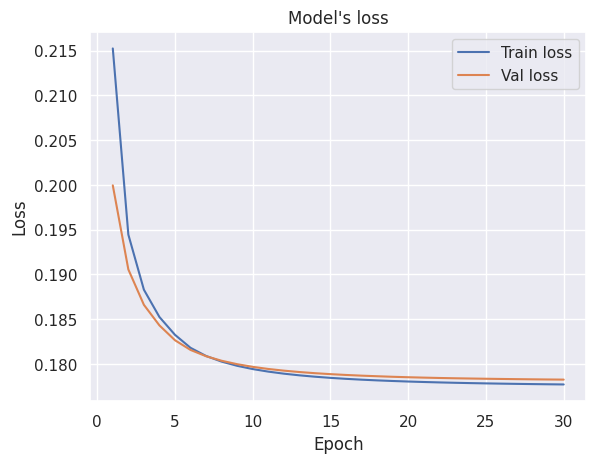

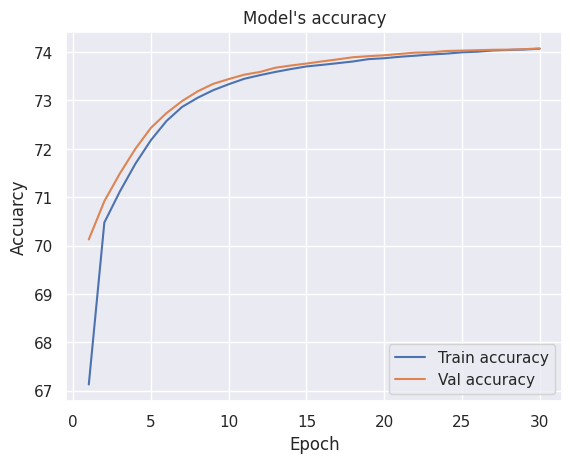

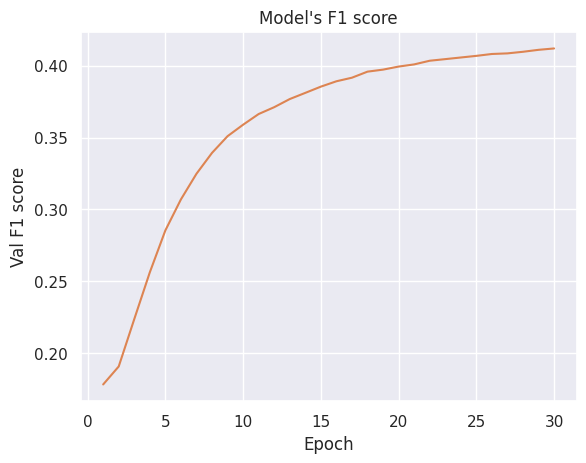

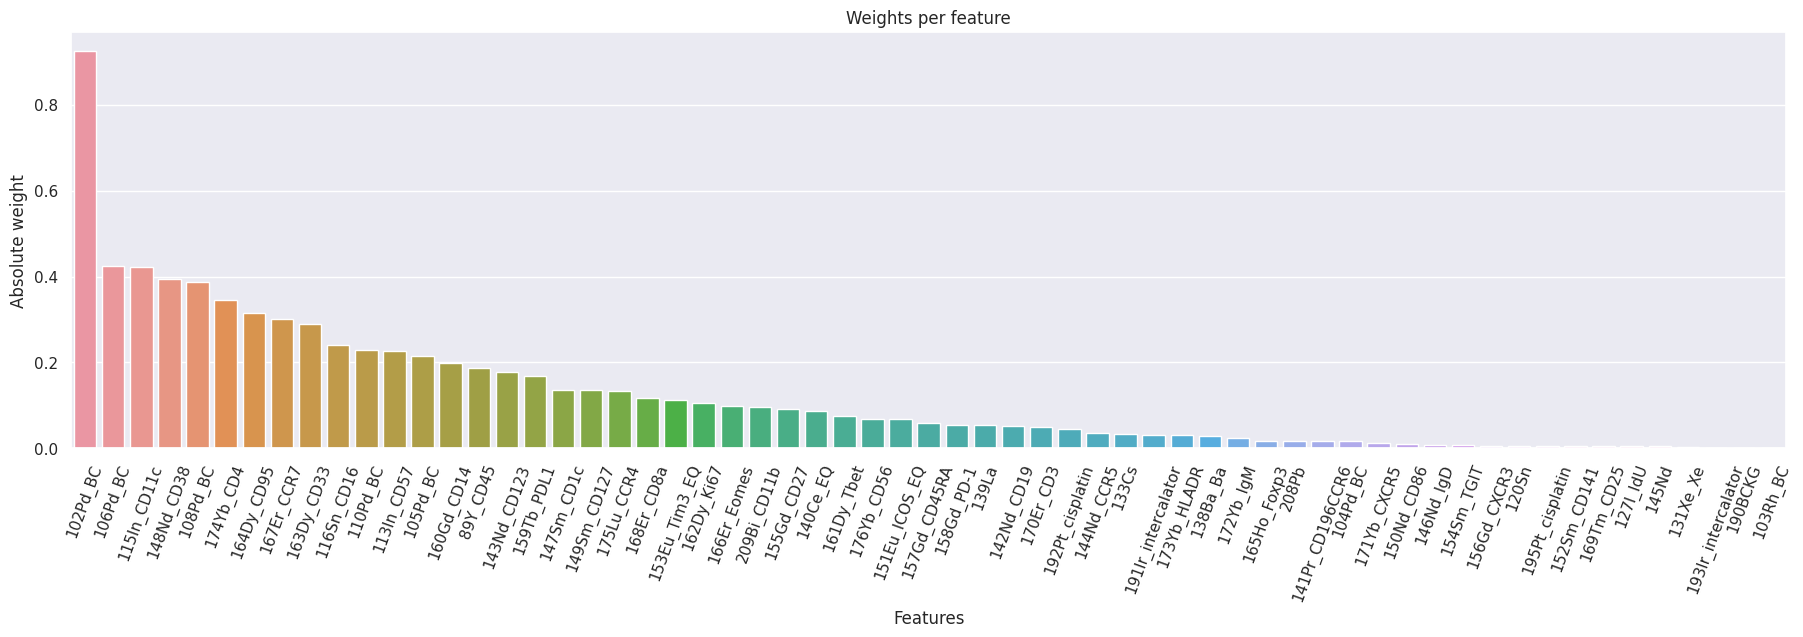

[0.4225621223449707, 0.34552907943725586, 0.2902873754501343, 0.24115799367427826, 0.2300516813993454, 0.18610207736492157, 0.17879696190357208, 0.13701167702674866, 0.132812961935997, 0.11847887933254242, 0.112981416285038, 0.09969862550497055, 0.09756971895694733, 0.09292535483837128, 0.08662062138319016, 0.06010211259126663, 0.035808004438877106, 0.031084245070815086, 0.030641211196780205, 0.017168786376714706, 0.016804171726107597, 0.016416383907198906, 0.008786913007497787, 0.0076504978351294994, 0.006863558664917946, 0.006617470178753138, 0.006366410292685032, 0.006071965675801039, 0.006000630557537079, 0.004532849416136742, 0.0013573106843978167, 0.00026616727700456977, -0.0014321486232802272, -0.004844696260988712, -0.005767046939581633, -0.010741236619651318, -0.01259458065032959, -0.01650816760957241, -0.024529801681637764, -0.02865961194038391, -0.03283807262778282, -0.04542655497789383, -0.04947572201490402, -0.052076805382966995, -0.053519126027822495, -0.05436494946479797

In [7]:
model1 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    1
]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-3)

model1_trainer = Trainer(model1, optimizer, loss_fn, device, epochs=30, silent=True)

model1_trainer.run(train_dataloader, test_dataloader)

model1_trainer.plot_loss()
model1_trainer.plot_accuracy()
model1_trainer.plot_f1()

model1.plot_weights(features=list(data.columns))
weights = abs(model1.get_weights(0))

idx = np.argsort(weights)[::-1]
weights = weights[idx].tolist()

print(weights)

In [8]:
weights = abs(model1.get_weights(0))

idx = np.argsort(weights)[::-1]
weights = weights[idx].tolist()

print(weights)

[0.9237420558929443, 0.42505574226379395, 0.4225621223449707, 0.3938198983669281, 0.3863064646720886, 0.34552907943725586, 0.31620579957962036, 0.30205366015434265, 0.2902873754501343, 0.24115799367427826, 0.2300516813993454, 0.22577691078186035, 0.2151382565498352, 0.19795218110084534, 0.18610207736492157, 0.17879696190357208, 0.16763094067573547, 0.13701167702674866, 0.13691911101341248, 0.132812961935997, 0.11847887933254242, 0.112981416285038, 0.10510333627462387, 0.09969862550497055, 0.09756971895694733, 0.09292535483837128, 0.08662062138319016, 0.07546305656433105, 0.06877482682466507, 0.0683625265955925, 0.06010211259126663, 0.054364949464797974, 0.053519126027822495, 0.052076805382966995, 0.04947572201490402, 0.04542655497789383, 0.035808004438877106, 0.03283807262778282, 0.031084245070815086, 0.030641211196780205, 0.02865961194038391, 0.024529801681637764, 0.017168786376714706, 0.016804171726107597, 0.01650816760957241, 0.016416383907198906, 0.01259458065032959, 0.010741236619

## Reg linéaire
### L1

100%|█████| 30/30 [04:29<00:00,  8.99s/it, Loss=0.1793, Accuracy=74%, F1=0.3627]


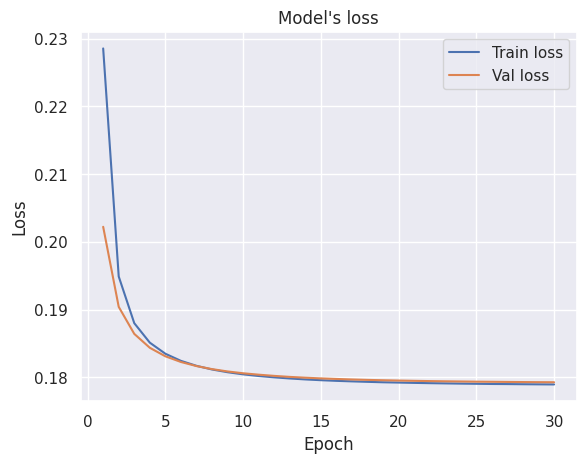

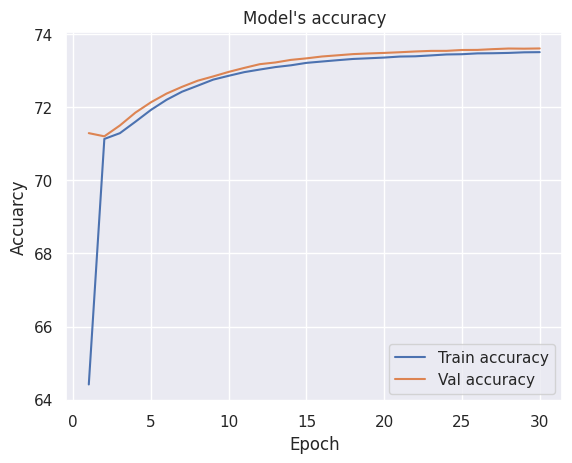

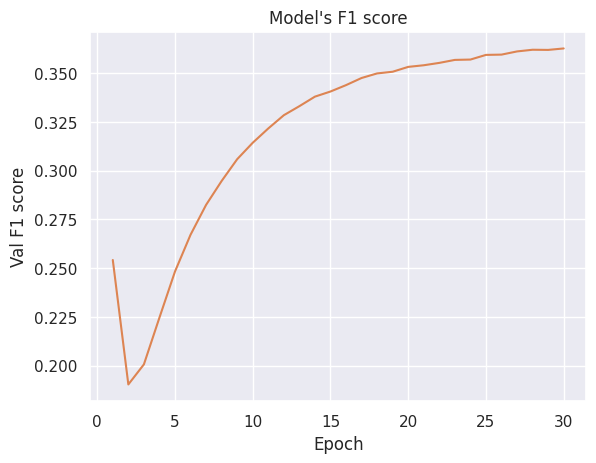

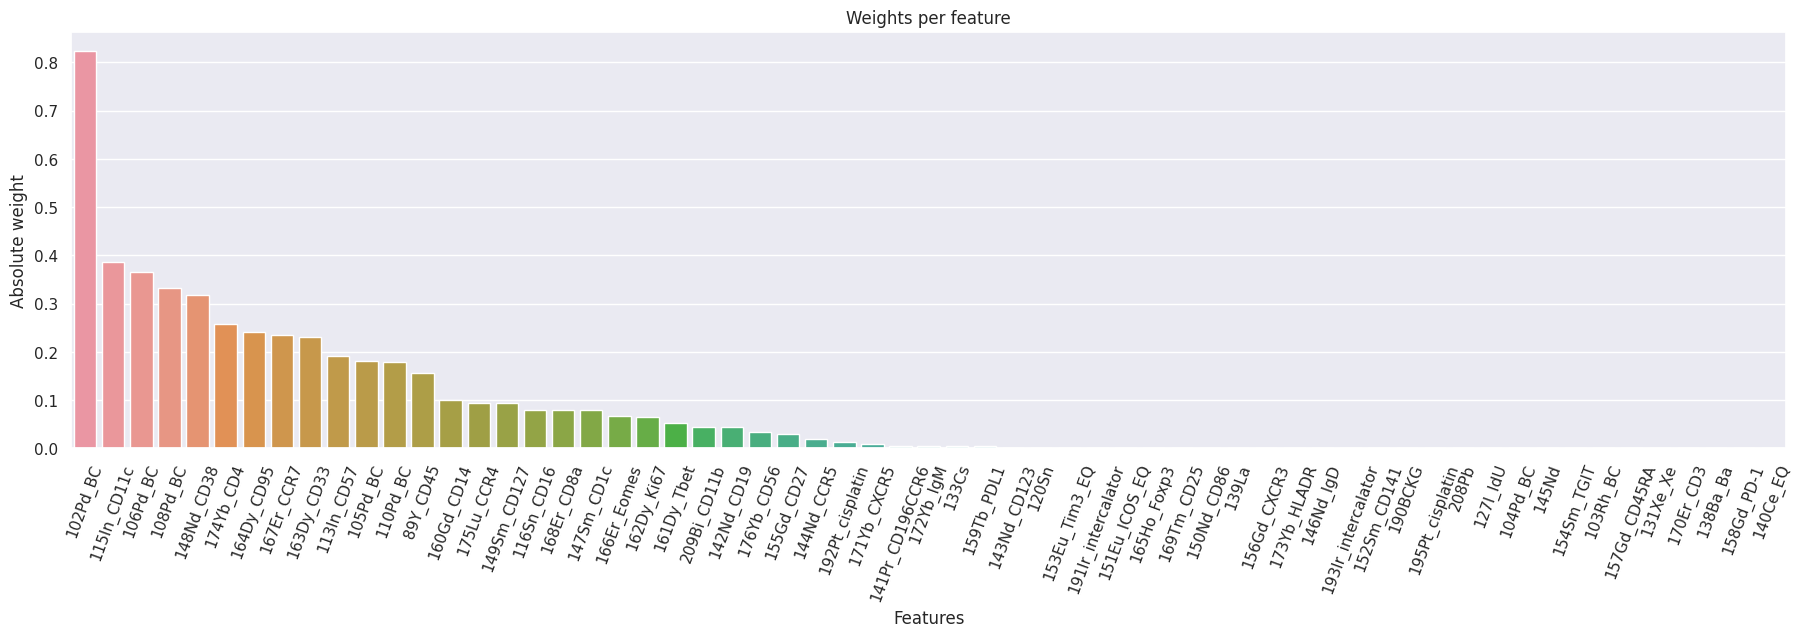

[0.8229413628578186, 0.38645362854003906, 0.3655138313770294, 0.33221501111984253, 0.31760773062705994, 0.25758713483810425, 0.24223385751247406, 0.2346201092004776, 0.230473592877388, 0.19129109382629395, 0.1817275583744049, 0.18014219403266907, 0.15736030042171478, 0.10081194341182709, 0.09443140774965286, 0.09358099848031998, 0.0807272419333458, 0.08003194630146027, 0.07996870577335358, 0.06679803133010864, 0.06537168473005295, 0.0529218465089798, 0.04492545127868652, 0.04451286420226097, 0.03511400520801544, 0.029434382915496826, 0.01920926757156849, 0.013789951801300049, 0.008520947769284248, 0.005958509631454945, 0.005788980983197689, 0.004314707592129707, 0.004066249821335077, 0.0016141983214765787, 0.0007499314961023629, 0.0005457489751279354, 0.00043067988008260727, 0.00036051604547537863, 0.00035371995181776583, 0.0003420001012273133, 0.00032082543475553393, 0.0002601693558972329, 0.00019095060997642577, 0.0001438645995222032, 0.00013191593461669981, 0.00011100564006483182, 8

In [9]:
model1_L1 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    1
]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model1_L1.parameters(), lr=1e-3)

model1_L1_trainer = Trainer(model1_L1, optimizer, loss_fn, device, epochs=30, L1_regularization=True, silent=True)

model1_L1_trainer.run(train_dataloader, test_dataloader)

model1_L1_trainer.plot_loss()
model1_L1_trainer.plot_accuracy()
model1_L1_trainer.plot_f1()

model1_L1.plot_weights(features=list(data.columns))
weights = abs(model1_L1.get_weights(0))

idx = np.argsort(weights)[::-1]
weights = weights[idx].tolist()

print(weights)

## Résaux deep
### Rien

100%|███| 100/100 [14:59<00:00,  8.99s/it, Loss=0.1215, Accuracy=83%, F1=0.6921]


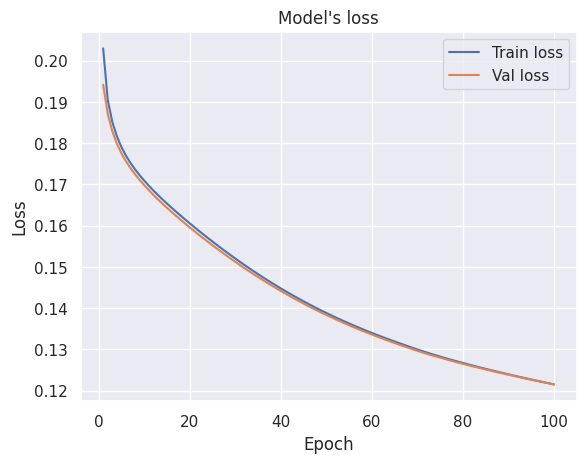

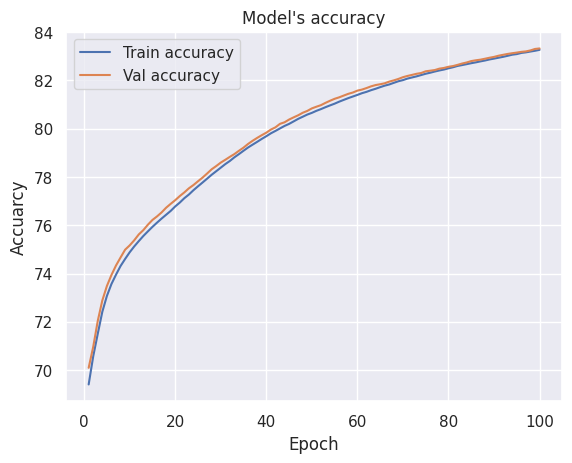

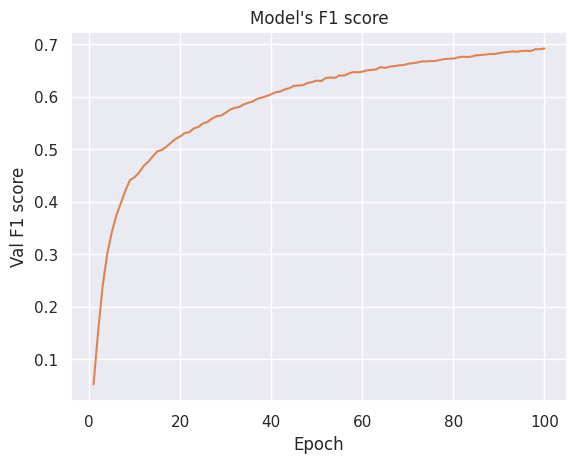

In [10]:
model2 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    500,
    1
]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3)

trainer = Trainer(model2, optimizer, loss_fn, device, epochs=100, L1_regularization=False, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()

### Dropout

100%|███| 100/100 [16:29<00:00,  9.89s/it, Loss=0.1260, Accuracy=83%, F1=0.6676]


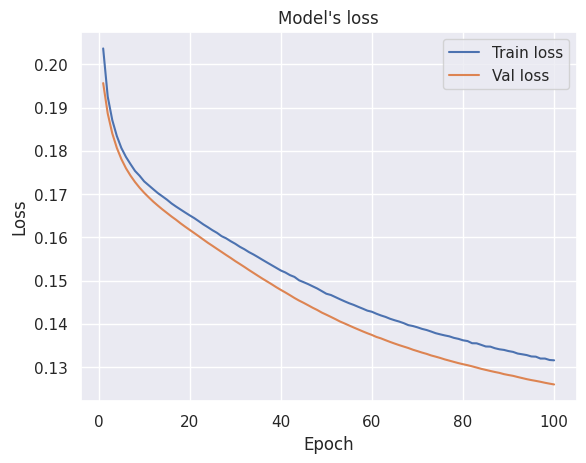

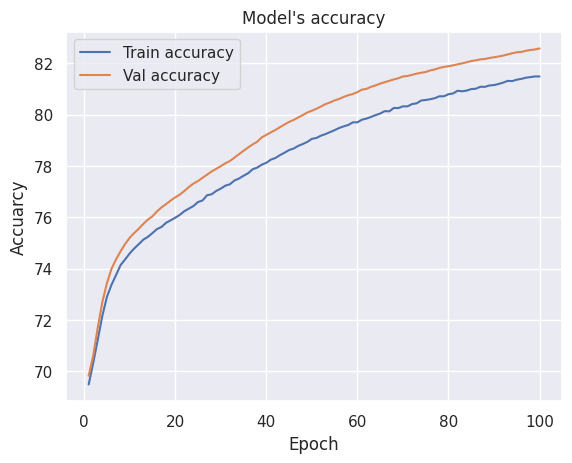

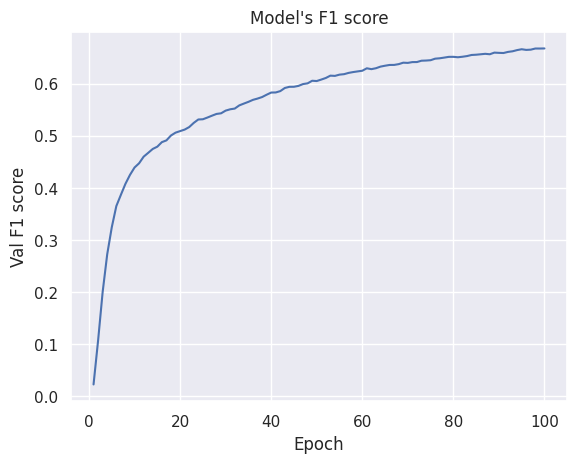

In [10]:
model2 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    500,
    1
], dropout=0.25, dropout_indexs=[1]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3)

trainer = Trainer(model2, optimizer, loss_fn, device, epochs=100, L1_regularization=False, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()

### L1

100%|███| 100/100 [17:55<00:00, 10.76s/it, Loss=0.1563, Accuracy=78%, F1=0.5456]


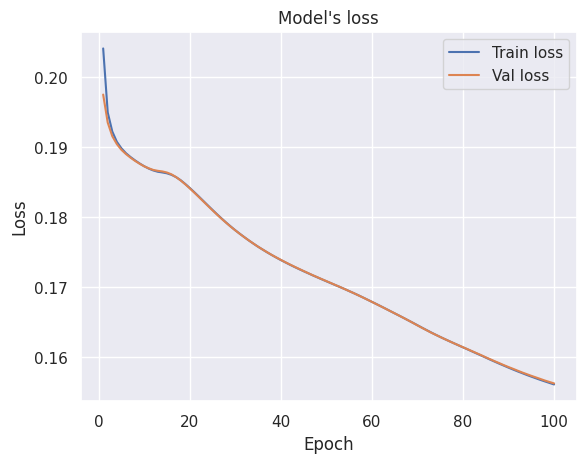

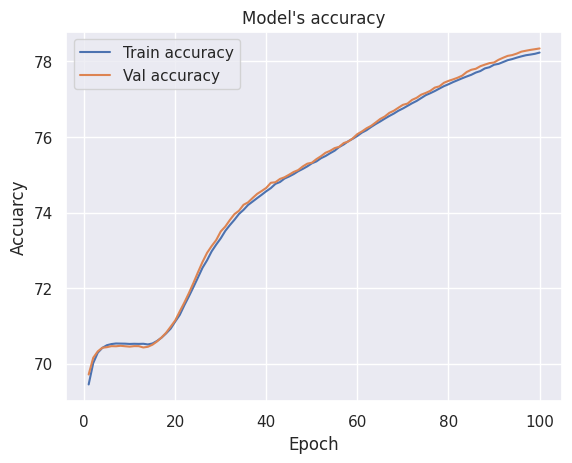

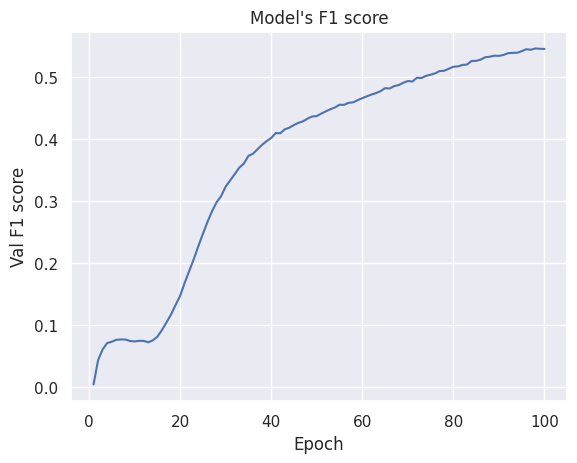

In [11]:
model2 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    500,
    1
]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3)

trainer = Trainer(model2, optimizer, loss_fn, device, epochs=100, L1_regularization=True, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()

### L1 & Dropout

100%|███| 200/200 [35:32<00:00, 10.66s/it, Loss=0.1597, Accuracy=77%, F1=0.4824]


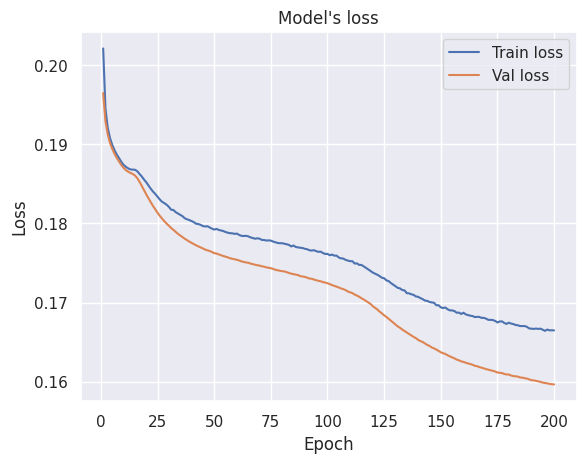

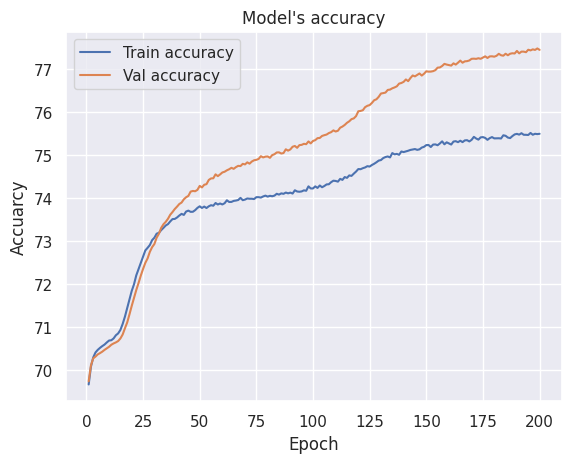

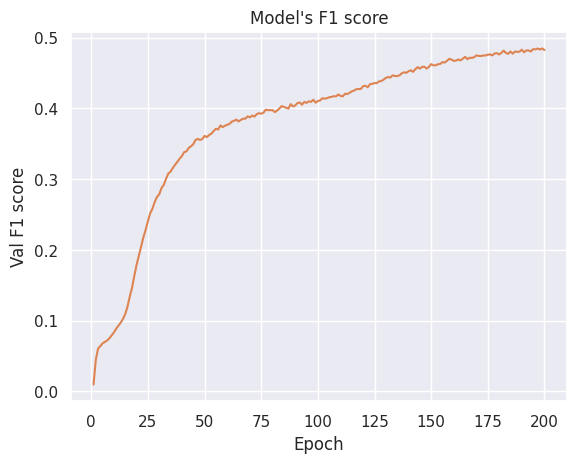

In [6]:
model2 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    500,
    1
], dropout=0.25, dropout_indexs=[1]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3)

trainer = Trainer(model2, optimizer, loss_fn, device, epochs=200, L1_regularization=True, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()